# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {High variance는 모델이 학습 데이터에 과도하게 적합(overfitting)하여 새로운 데이터에 대해 일반화되지 않는 문제를 의미한다. High variance를 가진 모델은 학습 데이터에 대한 예측 성능은 높지만, 검증 데이터나 테스트 데이터에 대한 성능이 떨어진다. 이로 인해 모델이 새로운 데이터에 대해 부정확한 예측을 할 가능성이 높아지며, 이는 모델의 신뢰도를 낮추는 결과를 초래한다.}

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {High bias는 모델이 학습 데이터에 대해 충분히 학습하지 못해 간과(underfitting)하게 되는 상황을 의미한다. 이 경우 모델이 너무 단순하여 학습 데이터의 패턴을 충분히 포착하지 못하며, 이는 학습 데이터뿐만 아니라 새로운 데이터에 대해서도 낮은 예측 성능을 보이게 만든다. High bias는 모델이 복잡한 데이터의 패턴을 제대로 반영하지 못하게 하며, 이는 전체적인 성능 저하를 유발한다.}

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ {Bagging (Bootstrap Aggregating)은 High variance 문제를 해결하는 데 효과적이다. Bagging은 다양한 데이터 샘플을 사용해 여러 개의 모델을 학습시킨 후, 이 모델들의 예측을 평균 또는 투표 방식으로 결합한다. 이를 통해 개별 모델이 과적합(overfitting)되는 문제를 줄이고, 전체 모델의 일반화 성능을 향상시킬 수 있다.}


- High bias problem : 🐻‍❄️ {Boosting은 High bias 문제를 해결하는 데 적합한 방법이다. Boosting은 학습이 덜 된 모델(약한 학습기)을 순차적으로 학습시키고, 각 단계에서 이전 모델의 오차를 줄이는 방향으로 다음 모델을 학습시킨다. 이를 통해 복잡한 패턴도 학습할 수 있도록 모델의 복잡도를 높여 underfitting 문제를 완화할 수 있다.}

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [4]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/Users/suhyun/Desktop/대외활동/동아리/투빅스/정규세션/3주차/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

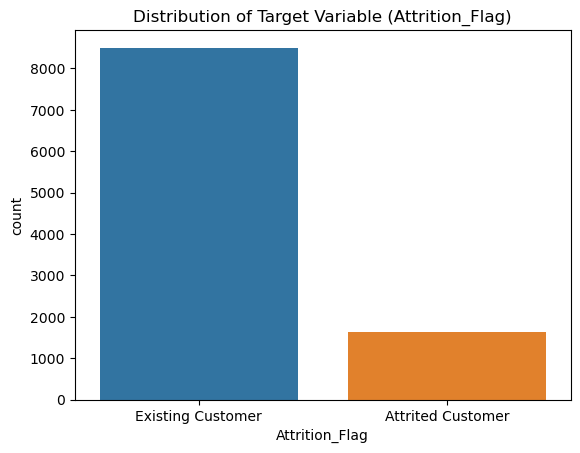

In [7]:
# 데이터프레임의 기본 정보 확인
df.info()

# 통계적 요약 확인
df.describe()

# 범주형 변수의 분포 확인
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(df[feature].value_counts())
    print("\n")

# 타겟 변수 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribution of Target Variable (Attrition_Flag)')
plt.show()

In [12]:
# 불필요한 칼럼이 있다면, 열 이름으로 삭제
# df.drop(['불필요한_칼럼1', '불필요한_칼럼2'], axis=1, inplace=True)

# 결측값 확인
print(df.isnull().sum())

# 범주형 변수를 One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 데이터 스케일링 (StandardScaler 사용)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# 스케일링된 데이터프레임으로 변환
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# 데이터 분할: 입력 데이터 X와 타겟 y 설정
X = df_scaled  # 전처리된 데이터
y = df['Attrition_Flag']  # 타겟 변수

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 모델 훈련 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    predictions = model.predict(X_test)  # 예측
    
    # 성능 평가 및 결과 출력
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n")


=== Decision Tree ===
Accuracy: 1.0000
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       327
Existing Customer       1.00      1.00      1.00      1699

         accuracy                           1.00      2026
        macro avg       1.00      1.00      1.00      2026
     weighted avg       1.00      1.00      1.00      2026

Confusion Matrix:
[[ 327    0]
 [   0 1699]]


=== Random Forest ===
Accuracy: 1.0000
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       327
Existing Customer       1.00      1.00      1.00      1699

         accuracy                           1.00      2026
        macro avg       1.00      1.00      1.00      2026
     weighted avg       1.00      1.00      1.00      2026

Confusion Matrix:
[[ 327    0]
 [   0 1699]]


=== AdaBoost ===
Accuracy: 1.0000
                   precision    recall  f1-score   support

Attrited Customer   